In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [ ]:
from tensorflow import keras

model = keras.models.load_model('/content/drive/MyDrive/fix model/fix_model.keras')

In [ ]:
model.save('/content/drive/MyDrive/fix model/fix_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!pip install tensorflow==2.15.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installation:

Load and split dataset

In [ ]:
dataset_dir = r"/content/drive/MyDrive/Final dataset"
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 29245 files belonging to 22 classes.
Using 23396 files for training.
Found 29245 files belonging to 22 classes.
Using 5849 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust', 'Corn___Northern_Leaf_Blight', 'Corn___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


Normalize data

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))


Data Augumentation

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
])
##apply aug to train data
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))


Opimize data loading

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


Validation data

In [ ]:
train_ds

To see shape of data

In [ ]:
for x , y in train_ds:
  print(x,x.shape)
  print(y,y.shape)
  break

Building model

In [ ]:
from tensorflow.keras.layers import Dense , Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras import regularizers
from tensorflow.keras import layers # This line imports the necessary module


model = Sequential([
    Input(shape=(180, 180, 3)), # Define input shape using Input layer
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    # Global Pooling
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(22, activation='softmax')
])

Compile model

In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    # loss='categorical_crossentropy',
     loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 90, 90, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 64)       

Model Training

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
training_history = model.fit(
          train_ds,
          validation_data=val_ds,
          batch_size=32,
          epochs=30,
          callbacks=[reduce_lr, early_stopping]
      )

Epoch 1/30
732/732 [==============================] - 921s 1s/step - loss: 1.9246 - accuracy: 0.4359 - val_loss: 10.3202 - val_accuracy: 0.1532 - lr: 0.0100
Epoch 2/30
732/732 [==============================] - 698s 953ms/step - loss: 1.3935 - accuracy: 0.5572 - val_loss: 2.8739 - val_accuracy: 0.3683 - lr: 0.0100
Epoch 3/30
732/732 [==============================] - 705s 963ms/step - loss: 1.2090 - accuracy: 0.6111 - val_loss: 5.4484 - val_accuracy: 0.2508 - lr: 0.0100
Epoch 4/30
732/732 [==============================] - 704s 962ms/step - loss: 1.0097 - accuracy: 0.6718 - val_loss: 3.1476 - val_accuracy: 0.4016 - lr: 0.0100
Epoch 5/30
732/732 [==============================] - 703s 960ms/step - loss: 0.8780 - accuracy: 0.7187 - val_loss: 0.9051 - val_accuracy: 0.7082 - lr: 0.0100
Epoch 6/30
732/732 [==============================] - 698s 954ms/step - loss: 0.7631 - accuracy: 0.7550 - val_loss: 2.8332 - val_accuracy: 0.4223 - lr: 0.0100
Epoch 7/30
732/732 [============================

To save history

In [ ]:
import pickle
from google.colab import drive

# Save history to Google Drive
with open('/content/drive/MyDrive/fix model/fix_training_history.pkl', 'wb') as f:
    pickle.dump(training_history.history, f)

print("Training history saved to Google Drive!")
# Save history
with open('fix_training_history.pkl', 'wb') as f:
    pickle.dump(training_history.history, f)

Training history saved to Google Drive!


Saving Model

In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/fix model/fix_model.keras')


Accuracy visualization

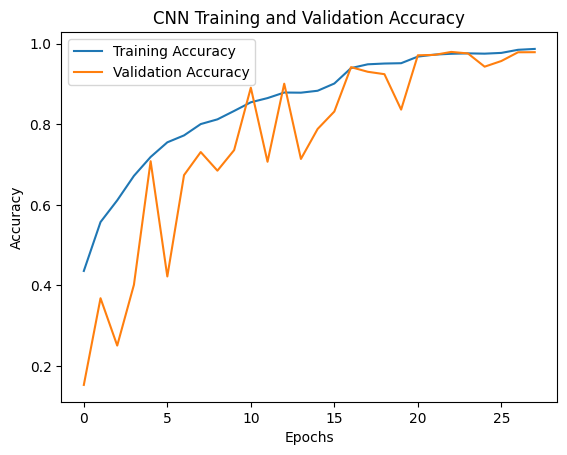

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have training_history from model.fit()

# Plot training and validation accuracy
plt.plot(training_history.history['accuracy'], label='Training Accuracy')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Loss vs epoch graph

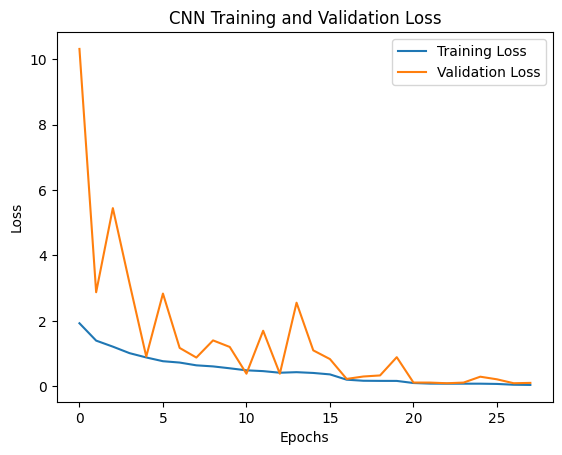

In [ ]:
# Plot training and validation loss
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Accuracy vs learning rate

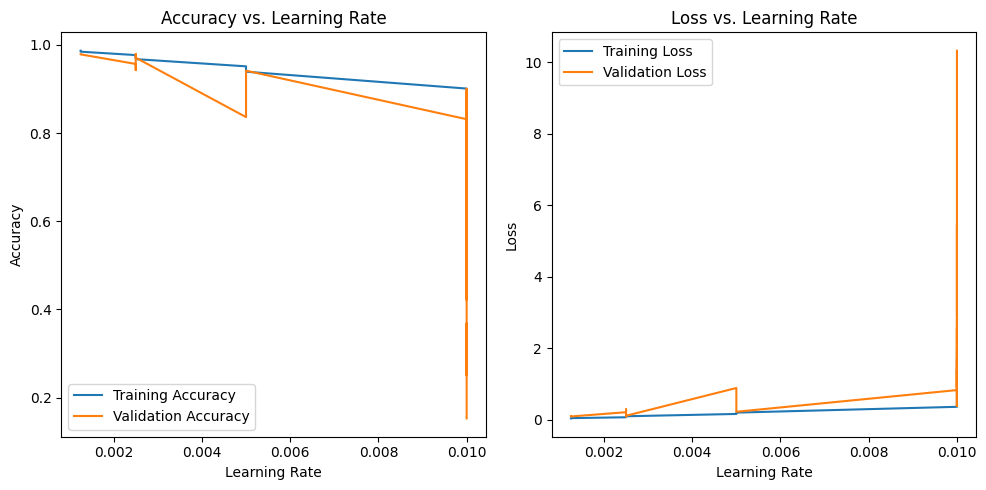

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have training_history from model.fit()

# Extract learning rates from ReduceLROnPlateau callback
learning_rates = training_history.history['lr']

# Plot accuracy vs. learning rate
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(learning_rates, training_history.history['accuracy'], label='Training Accuracy')
plt.plot(learning_rates, training_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Learning Rate')
plt.legend()

# Plot loss vs. learning rate
plt.subplot(1, 2, 2)
plt.plot(learning_rates, training_history.history['loss'], label='Training Loss')
plt.plot(learning_rates, training_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Loss vs. Learning Rate')
plt.legend()

plt.tight_layout()
plt.show()

loss vs learning rate

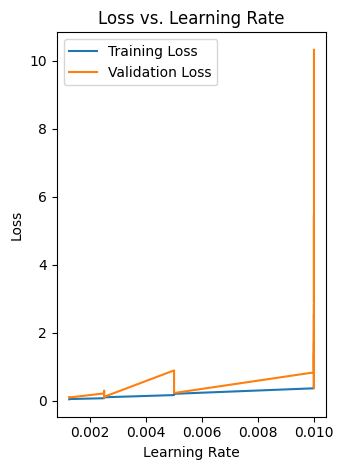

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(learning_rates, training_history.history['loss'], label='Training Loss')
plt.plot(learning_rates, training_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Loss vs. Learning Rate')
plt.legend()

plt.tight_layout()
plt.show()

Epoch vs learning rate

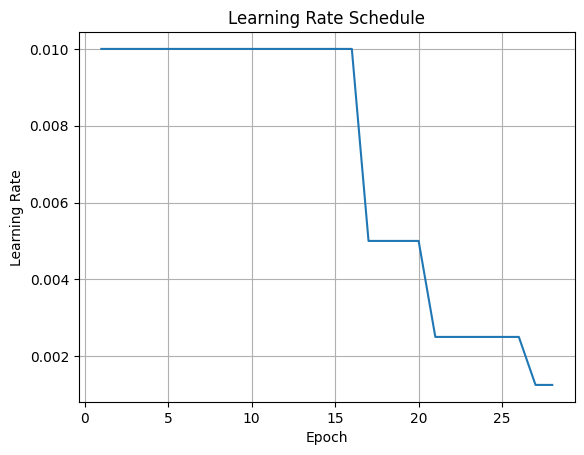

In [ ]:
import matplotlib.pyplot as plt


learning_rates = training_history.history['lr']

# Generate epochs range for x-axis
epochs = range(1, len(learning_rates) + 1)

# Plot learning rate vs. epoch
plt.plot(epochs, learning_rates)
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.grid(True)
plt.show()

Removing classification layer of cnn model

In [ ]:
from tensorflow import keras
feature_extractor = keras.Model(
    inputs=model.inputs,
    outputs=model.layers[-2].output
)


Extract feature and labels

In [ ]:
import numpy as np
def extract_features(dataset, feature_extractor):
    features = []
    labels = []
    for images, lbls in dataset:
        feats = feature_extractor.predict(images)  # Extract features
        features.append(feats)
        labels.append(lbls.numpy())
    return np.concatenate(features), np.concatenate(labels)

# Extract features for training and validation
train_features, train_labels = extract_features(train_ds, feature_extractor)
val_features, val_labels = extract_features(val_ds, feature_extractor)


1/1 [==============================] - 0s 116ms/step


Adding feature to Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
rf_classifier.fit(train_features, train_labels)

# Evaluate on validation set
val_predictions = rf_classifier.predict(val_features)
accuracy = accuracy_score(val_labels, val_predictions)

print(f"Validation Accuracy with Random Forest: {accuracy:.2f}")

Validation Accuracy with Random Forest: 0.98


Saving random forest model

In [ ]:
import joblib


# Save the Random Forest model to Google Drive
joblib.dump(rf_classifier, '/content/drive/MyDrive/fix model/rf_fix_model.pkl')

print("Random Forest model saved to Google Drive!")

Random Forest model saved to Google Drive!


Accuracy for random forest

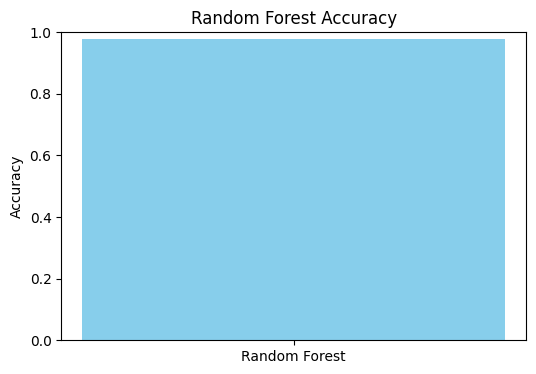

In [ ]:
plt.figure(figsize=(6, 4))  # Adjust figure size if needed
plt.bar(['Random Forest'], [accuracy], color='skyblue')
plt.ylim(0, 1)  # Set y-axis limits for accuracy (0 to 1)
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy')
plt.show()

Confusion matrix

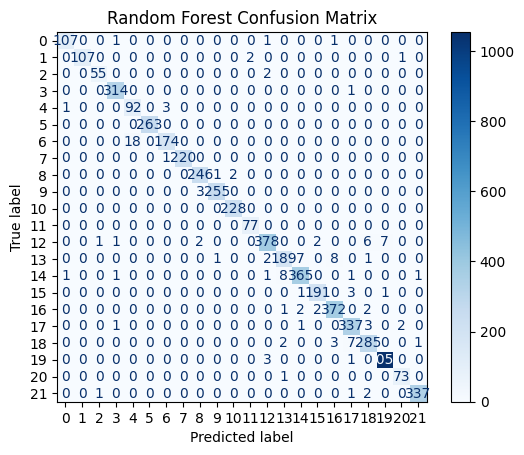

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(val_labels, val_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix')
plt.show()


Roc curve

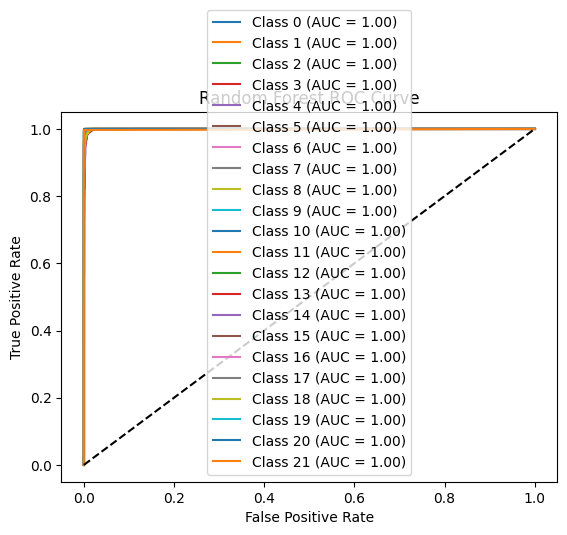

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


val_labels_binary = label_binarize(val_labels, classes=list(range(len(rf_classifier.classes_))))


val_probabilities = rf_classifier.predict_proba(val_features)


plt.figure()
for i in range(len(rf_classifier.classes_)):
    fpr, tpr, _ = roc_curve(val_labels_binary[:, i], val_probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('Random Forest ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Calculation of Accuracy, precision, recall and f1 score

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


val_predictions_labels = val_predictions


# Calculate metrics:
accuracy = accuracy_score(val_labels, val_predictions_labels)
precision = precision_score(val_labels, val_predictions_labels, average='micro')
recall = recall_score(val_labels, val_predictions_labels, average='micro')
f1 = f1_score(val_labels, val_predictions_labels, average='micro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9778
Precision: 0.9778
Recall: 0.9778
F1 Score: 0.9778


For different class

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calculate_metrics(true_labels, predicted_labels):
    """Calculates accuracy, precision, recall, and F1-score."""
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted')  # or 'micro', 'macro'
    recall = recall_score(true_labels, predicted_labels, average='weighted')  # or 'micro', 'macro'
    f1 = f1_score(true_labels, predicted_labels, average='weighted')  # or 'micro', 'macro'
    return accuracy, precision, recall, f1

# Assuming class_names is a list of strings representing the class labels
class_names = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy',
              'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust', 'Corn___Northern_Leaf_Blight', 'Corn___healthy',
              'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy',
              'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot',
              'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
              'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

# Function to map sub-class labels to main class labels
def map_to_main_class(label):
    class_name = class_names[label]
    if "Apple" in class_name:
        return 0  # Apple
    elif "Corn" in class_name:
        return 1  # Corn
    elif "Grape" in class_name:
        return 2  # Grape
    elif "Tomato" in class_name:
        return 3  # Tomato
    else:
        return -1  # Unknown class

# Map validation labels and predictions to main classes
val_labels_main = [map_to_main_class(label) for label in val_labels]
val_predictions_main = [map_to_main_class(label) for label in val_predictions]

# Separate labels and predictions for each main class
apple_labels = [l for l, p in zip(val_labels_main, val_predictions_main) if l == 0]
apple_predictions = [p for l, p in zip(val_labels_main, val_predictions_main) if l == 0]

corn_labels = [l for l, p in zip(val_labels_main, val_predictions_main) if l == 1]
corn_predictions = [p for l, p in zip(val_labels_main, val_predictions_main) if l == 1]

grape_labels = [l for l, p in zip(val_labels_main, val_predictions_main) if l == 2]
grape_predictions = [p for l, p in zip(val_labels_main, val_predictions_main) if l == 2]

tomato_labels = [l for l, p in zip(val_labels_main, val_predictions_main) if l == 3]
tomato_predictions = [p for l, p in zip(val_labels_main, val_predictions_main) if l == 3]

# Calculate and print metrics for each main class
def print_metrics(main_class_name, true_labels, predicted_labels):
    accuracy, precision, recall, f1 = calculate_metrics(true_labels, predicted_labels)
    print(f"{main_class_name} Metrics:")
    print(f"  Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

print_metrics("Apple", apple_labels, apple_predictions)
print_metrics("Corn", corn_labels, corn_predictions)
print_metrics("Grape", grape_labels, grape_predictions)
print_metrics("Tomato", tomato_labels, tomato_predictions)

Apple Metrics:
  Accuracy: 0.9865, Precision: 1.0000, Recall: 0.9865, F1-score: 0.9932
Corn Metrics:
  Accuracy: 0.9987, Precision: 1.0000, Recall: 0.9987, F1-score: 0.9994
Grape Metrics:
  Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Tomato Metrics:
  Accuracy: 0.9975, Precision: 1.0000, Recall: 0.9975, F1-score: 0.9988


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Testing the image

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib as plt




Importing model

In [ ]:
!pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 69.0 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/new model/best_new_final_model.keras")

In [ ]:
model.summary()

Test model with image

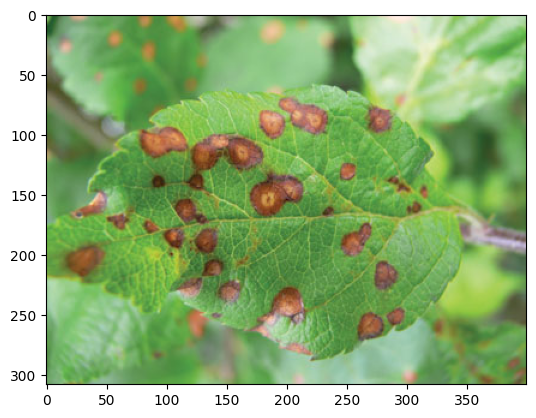

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = "/content/drive/MyDrive/Models/test/apple_black_rot.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#displaying image
plt.imshow(img)
plt.show()

Testing model

1/1 [==============================] - 1s 546ms/step


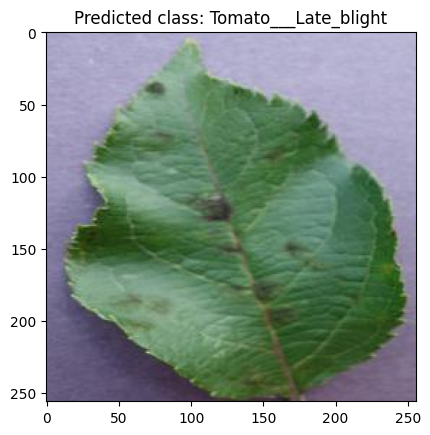

Predicted class: Tomato___Late_blight


In [ ]:
import joblib
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2

# Define class names (replace with your actual class names)
class_names = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust', 'Corn___Northern_Leaf_Blight', 'Corn___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

# Load the saved RF model
rf_model = joblib.load('/content/drive/MyDrive/fix model/rf_fix_model.pkl')

# Load the saved CNN model (feature extractor)
cnn_model = tf.keras.models.load_model('/content/drive/MyDrive/new model/best_new_final_model.keras')

# Remove the classification layer from the CNN model to use as a feature extractor
feature_extractor = tf.keras.Model(
    inputs=cnn_model.inputs,
    outputs=cnn_model.layers[-2].output  # Output of the layer before the final classification layer
)

# Function to preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(180, 180))  # Adjust target size if needed
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize the image
    return img

# Path to your test image
img_path = "/content/drive/MyDrive/New dataset/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG"

# Preprocess the image
img = preprocess_image(img_path)

# Extract features using the CNN feature extractor
features = feature_extractor.predict(img)

# Reshape the features to a 2D array
features = features.reshape(features.shape[0], -1)

# Make prediction using the RF model
prediction = rf_model.predict(features)

# Get the predicted class label
predicted_class = class_names[prediction[0]]

# Display the image and prediction
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(f"Predicted class: {predicted_class}")
plt.show()

print(f"Predicted class: {predicted_class}")

Test only from rf model

In [ ]:
import joblib
import numpy as np
from tensorflow.keras.preprocessing import image # Keep this for image loading and preprocessing

# Define class names
class_names = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust', 'Corn___Northern_Leaf_Blight', 'Corn___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

# Load the saved RF model
rf_model = joblib.load('/content/drive/MyDrive/Models/rf_final_fix__model.pkl')

# Function to preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(32, 32), color_mode="grayscale")  # Change target size to (32, 32) and load as grayscale
    img = image.img_to_array(img)
    # Reshape the image to 2 dimensions (flatten the image)
    img = img.reshape(1, -1) # Reshape to (1, num_features) where 1 is the number of samples
    img = img / 255.0  # Normalize the image
    return img

# Path to your test image
img_path = "/content/drive/MyDrive/New dataset/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003.JPG"

# Preprocess the image
img = preprocess_image(img_path)

# Make prediction using the RF model directly
prediction = rf_model.predict(img)

# Get the predicted class label
predicted_class = class_names[prediction[0]]

print(f"Predicted class: {predicted_class}")

Predicted class: Tomato___Tomato_Yellow_Leaf_Curl_Virus
